# **Object Detection and Avoid Collision using AI in Autonomous Driving**

Dataset: https://www.kaggle.com/datasets/aayusmaanjain/bdd100k-for-self-driving-cars/data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

required libraries

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# Set up TensorFlow to use the GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

capture data to train a model for object dection on road

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d aayusmaanjain/bdd100k-for-self-driving-cars
!unzip /content/bdd100k-for-self-driving-cars.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/adb9b134-8a100233.jpg  
  inflating: Data/train/adb9b134-8a100233.txt  
  inflating: Data/train/adb9b134-d206c019.jpg  
  inflating: Data/train/adb9b134-d206c019.txt  
  inflating: Data/train/adb9b134-f6488c86.jpg  
  inflating: Data/train/adb9b134-f6488c86.txt  
  inflating: Data/train/adbb4e11-be1c027f.jpg  
  inflating: Data/train/adbb4e11-be1c027f.txt  
  inflating: Data/train/adbb62ec-4b36ddb8.jpg  
  inflating: Data/train/adbb62ec-4b36ddb8.txt  
  inflating: Data/train/adc75116-a21302ef.jpg  
  inflating: Data/train/adc75116-a21302ef.txt  
  inflating: Data/train/adc7cd33-bd1b5456.jpg  
  inflating: Data/train/adc7cd33-bd1b5456.txt  
  inflating: Data/train/adc8a7c2-7bbe4661.jpg  
  inflating: Data/train/adc8a7c2-7bbe4661.txt  
  inflating: Data/train/add0a5e3-8a942112.jpg  
  inflating: Data/train/add0a5e3-8a942112.txt  
  inflating: Data/train/add892d9-267652be.jpg  
  inflating: Data/train/add892d9-2676

Data Collection and Preprocessing

Initialising constants

In [ ]:
labels = [
    "bike",
    "bus",
    "car",
    "motor",
    "person",
    "rider",
    "traffic light",
    "traffic sign",
    "train",
    "truck"
]
train_path='/content/Data/train'
val_path='/content/Data/val'
model_path='/content/Data/best.pt'
inference_path='/content/Data/inference_vid.mp4'
steering_wheel_path='/content/Data/steering_wheel_image.jpg'

In [ ]:
# Get paths of all train images
train_img = glob(f'{train_path}/*.jpg')

# Filter train samples with valid labels
valid_train_samples = []
for img_path in train_img:
    img_id = os.path.splitext(os.path.basename(img_path))[0]
    label_file = os.path.join(train_path, f'{img_id}.txt')
    if os.path.exists(label_file):
        valid_train_samples.append((img_path, label_file))

In [ ]:
# Check if directories contain image files
print("Contents of train directory:")
print(glob(f'{train_path}/*.jpg'))

print("\nContents of val directory:")
print(glob(f'{val_path}/*.jpg'))

Contents of train directory:
['/content/Data/train/8bb1dced-b1dd8f5f.jpg', '/content/Data/train/07c58bb0-9acc3994.jpg', '/content/Data/train/263ccc57-79aada48.jpg', '/content/Data/train/2c730c48-b75b1cfd.jpg', '/content/Data/train/3b7f7078-d09dfc43.jpg', '/content/Data/train/8f8a184f-bc5da9f9.jpg', '/content/Data/train/6430ab04-76b67831.jpg', '/content/Data/train/55de4228-c37a8e3f.jpg', '/content/Data/train/8dacce2d-7310ed9a.jpg', '/content/Data/train/85d654e6-0bfe5d5d.jpg', '/content/Data/train/24d0c95f-4f2921ef.jpg', '/content/Data/train/67d809f9-e384665e.jpg', '/content/Data/train/13ce5680-001c3f7f.jpg', '/content/Data/train/0ac0714b-952bcf85.jpg', '/content/Data/train/1e02aa1d-98acb002.jpg', '/content/Data/train/81ebb4a9-01a6aaeb.jpg', '/content/Data/train/0fb86701-19f58a57.jpg', '/content/Data/train/7251770f-cd674fd5.jpg', '/content/Data/train/14eb5976-0844b87f.jpg', '/content/Data/train/800a54e8-68f98058.jpg', '/content/Data/train/af38a2a8-8c4dc8bc.jpg', '/content/Data/train/2eaa

Data Analysis

In [ ]:
train_img = glob(f'{train_path}/*.jpg')
val_img = glob(f'{val_path}/*.jpg')
n_samples = 15
train_sample = np.random.choice(len(valid_train_samples), size=n_samples, replace=False)
val_sample = np.random.choice(val_img, size=n_samples)

In [ ]:
# Debug prints
print("Contents of train_img:")
print(train_img)
print("\nContents of train_sample:")
print(train_sample)

Contents of train_img:
['/content/Data/train/8bb1dced-b1dd8f5f.jpg', '/content/Data/train/07c58bb0-9acc3994.jpg', '/content/Data/train/263ccc57-79aada48.jpg', '/content/Data/train/2c730c48-b75b1cfd.jpg', '/content/Data/train/3b7f7078-d09dfc43.jpg', '/content/Data/train/8f8a184f-bc5da9f9.jpg', '/content/Data/train/6430ab04-76b67831.jpg', '/content/Data/train/55de4228-c37a8e3f.jpg', '/content/Data/train/8dacce2d-7310ed9a.jpg', '/content/Data/train/85d654e6-0bfe5d5d.jpg', '/content/Data/train/24d0c95f-4f2921ef.jpg', '/content/Data/train/67d809f9-e384665e.jpg', '/content/Data/train/13ce5680-001c3f7f.jpg', '/content/Data/train/0ac0714b-952bcf85.jpg', '/content/Data/train/1e02aa1d-98acb002.jpg', '/content/Data/train/81ebb4a9-01a6aaeb.jpg', '/content/Data/train/0fb86701-19f58a57.jpg', '/content/Data/train/7251770f-cd674fd5.jpg', '/content/Data/train/14eb5976-0844b87f.jpg', '/content/Data/train/800a54e8-68f98058.jpg', '/content/Data/train/af38a2a8-8c4dc8bc.jpg', '/content/Data/train/2eaa3322-3

Loading image: /content/Data/train/328cdc70-6b9bb32c.jpg
Processing labels for image: /content/Data/train/328cdc70-6b9bb32c.jpg


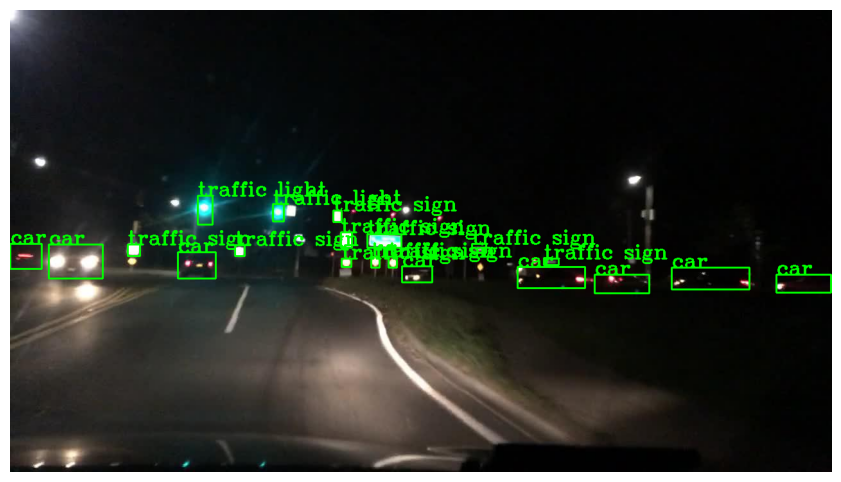

Loading image: /content/Data/train/897055e3-1843d600.jpg
Processing labels for image: /content/Data/train/897055e3-1843d600.jpg


Loading image: /content/Data/train/32b39457-e1d273e4.jpg
Processing labels for image: /content/Data/train/32b39457-e1d273e4.jpg


Loading image: /content/Data/train/09b2e125-b93da960.jpg
Processing labels for image: /content/Data/train/09b2e125-b93da960.jpg


Loading image: /content/Data/train/2c91ad18-61780df1.jpg
Processing labels for image: /content/Data/train/2c91ad18-61780df1.jpg


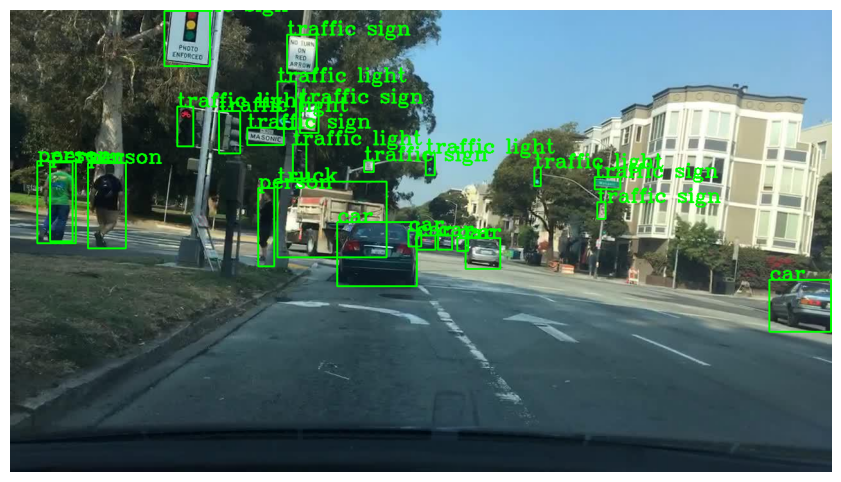

Loading image: /content/Data/train/a16daafe-01fc534b.jpg
Processing labels for image: /content/Data/train/a16daafe-01fc534b.jpg


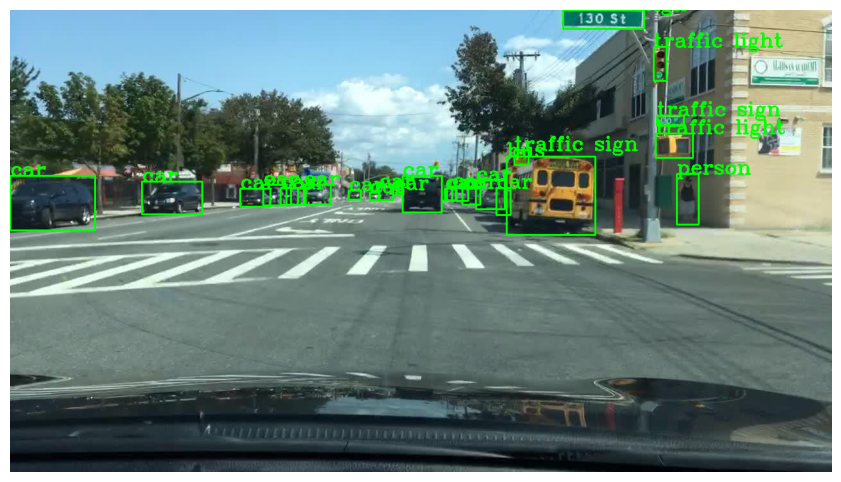

Loading image: /content/Data/train/067449e7-717df154.jpg
Processing labels for image: /content/Data/train/067449e7-717df154.jpg


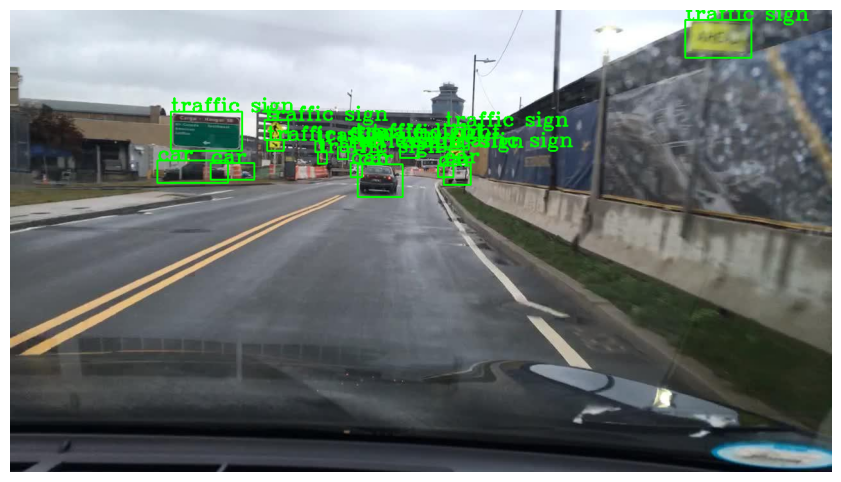

Loading image: /content/Data/train/10bddcb9-4a40d217.jpg
Processing labels for image: /content/Data/train/10bddcb9-4a40d217.jpg


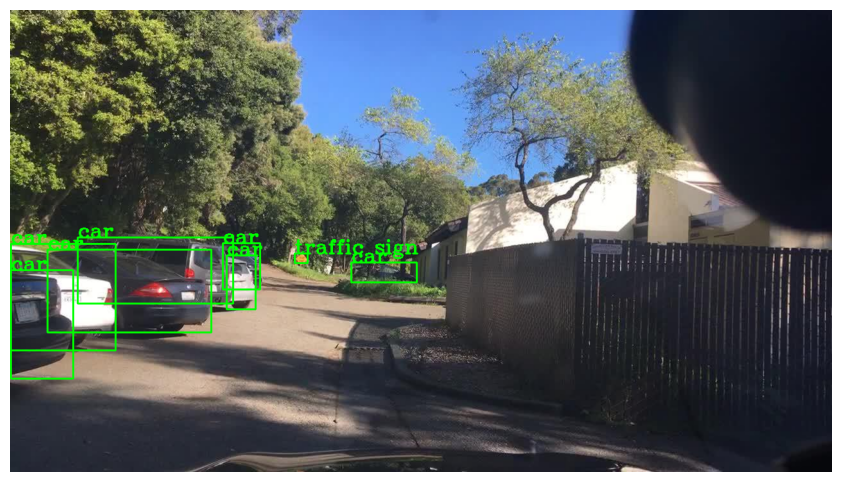

Loading image: /content/Data/train/5cc1f61a-d8ba3044.jpg
Processing labels for image: /content/Data/train/5cc1f61a-d8ba3044.jpg


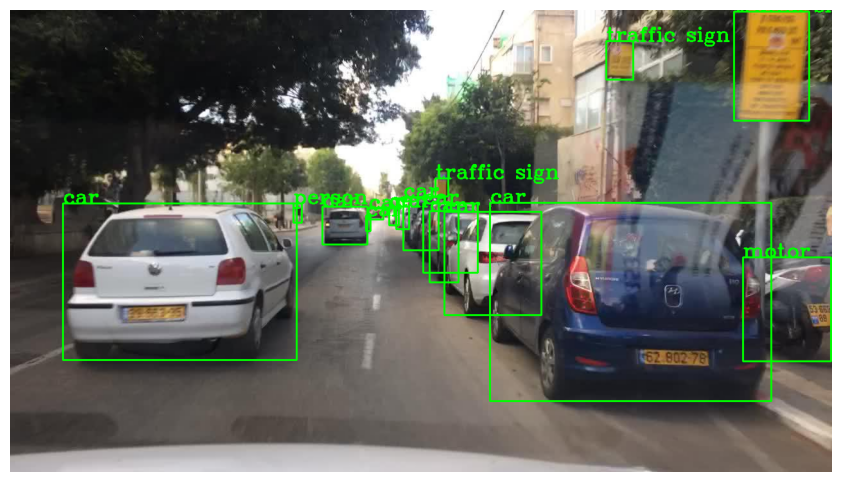

Loading image: /content/Data/train/4d3946df-22170120.jpg
Processing labels for image: /content/Data/train/4d3946df-22170120.jpg


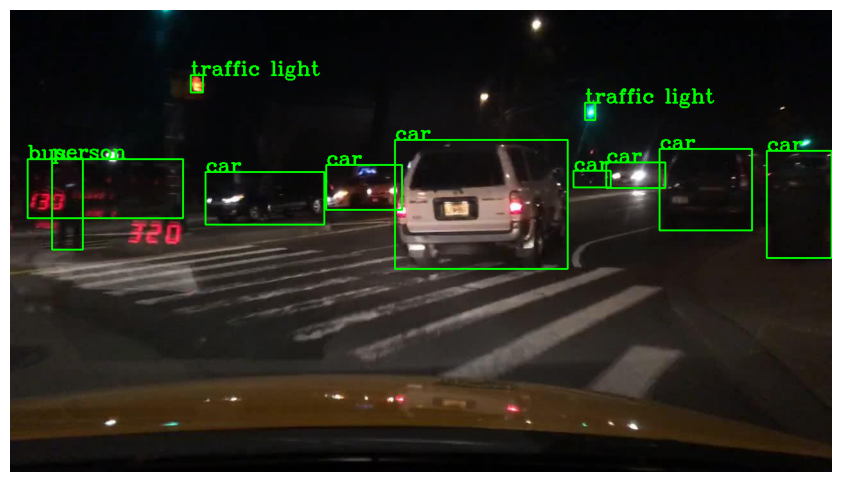

Loading image: /content/Data/train/7b5b705c-652ca038.jpg
Processing labels for image: /content/Data/train/7b5b705c-652ca038.jpg


Loading image: /content/Data/train/6ec3709a-2341a1e2.jpg
Processing labels for image: /content/Data/train/6ec3709a-2341a1e2.jpg


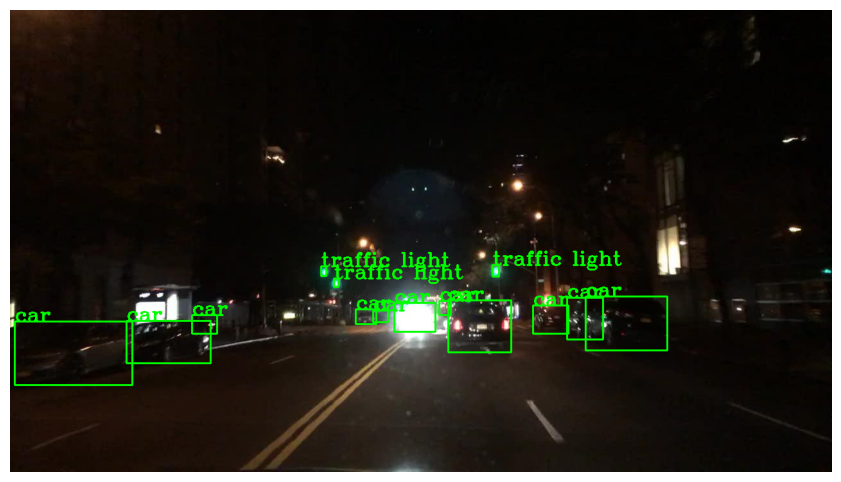

Loading image: /content/Data/train/40ee3b4e-8f009db3.jpg
Processing labels for image: /content/Data/train/40ee3b4e-8f009db3.jpg


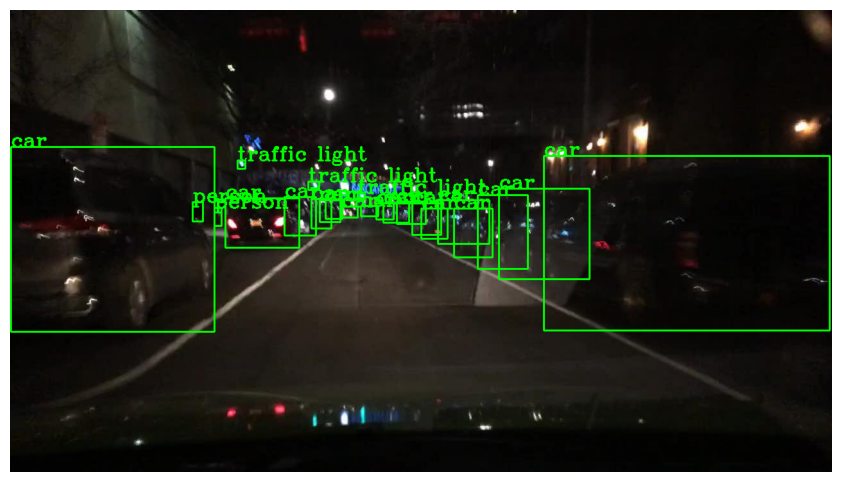

Loading image: /content/Data/train/695d1c25-4df502b6.jpg
Processing labels for image: /content/Data/train/695d1c25-4df502b6.jpg


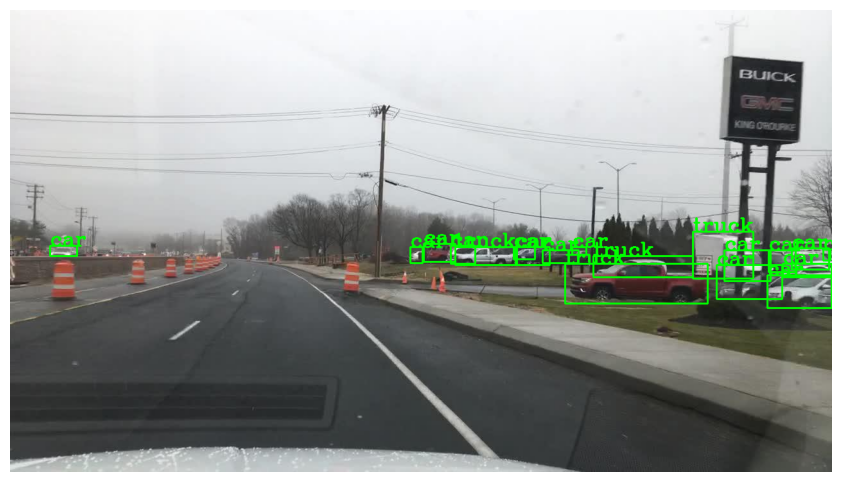

Loading image: /content/Data/train/88c5daf5-5ea25303.jpg
Processing labels for image: /content/Data/train/88c5daf5-5ea25303.jpg


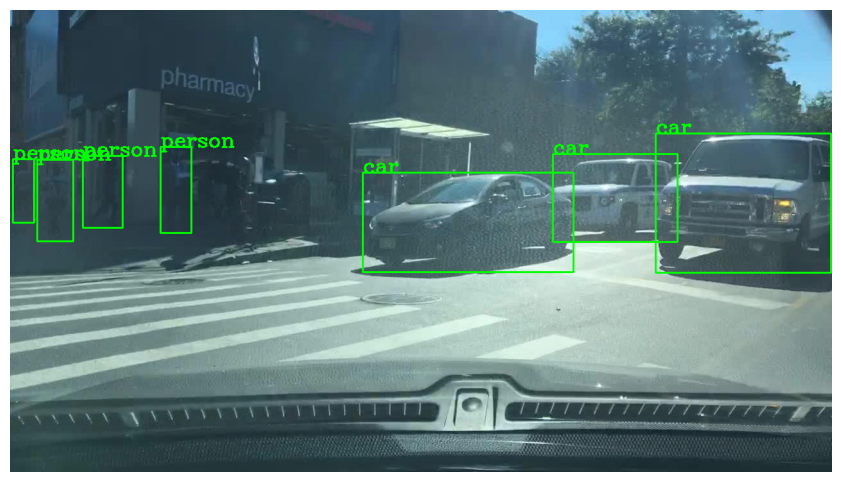

In [ ]:
# Process and display selected train samples
IMG_HEIGHT = 720
IMG_WIDTH = 1280

for i in train_sample:
    img_path, label_file = valid_train_samples[i]
    _, ax = plt.subplots(figsize=(16, 6))

    print(f"Loading image: {img_path}")
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error loading image: {img_path}")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(f"Processing labels for image: {img_path}")

    if not os.path.exists(label_file):
        print(f"Label file '{label_file}' not found. Skipping image.")
    else:
        with open(label_file, 'r') as f:
            lines = f.readlines()

        for label in lines:
            splits = label.split()
            category = labels[int(splits[0])]
            x_center = float(splits[1]) * IMG_WIDTH
            y_center = float(splits[2]) * IMG_HEIGHT
            width = float(splits[3]) * IMG_WIDTH
            height = float(splits[4]) * IMG_HEIGHT

            pt1_x = x_center - width/2
            pt1_y = y_center - height/2
            pt2_x = x_center + width/2
            pt2_y = y_center + height/2

            pt1 = (int(pt1_x), int(pt1_y))
            pt2 = (int(pt2_x), int(pt2_y))

            img = cv2.rectangle(img, pt1=pt1, pt2=pt2, color=(0, 255, 0), thickness=2)
            img = cv2.putText(img, category, org=pt1,
                              color=(0, 255, 0), fontFace=cv2.FONT_HERSHEY_COMPLEX,
                              fontScale=1, thickness=2)

    ax.imshow(img)
    ax.axis('off')
    plt.show()


Explore the gathered data

In [ ]:
import yaml
import torch
import pandas as pd

In [ ]:
! git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16582, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 16582 (delta 30), reused 39 (delta 18), pack-reused 16522
Receiving objects: 100% (16582/16582), 15.13 MiB | 13.78 MiB/s, done.
Resolving deltas: 100% (11387/11387), done.


In [ ]:
# Creating data.yaml file
data = {
    'train':os.path.abspath(train_path),
    'val':os.path.abspath(val_path),
    'names':labels,
    'nc':len(labels)
}

with open('data.yaml', 'w+') as f:
    yaml.safe_dump(data, f)
model = torch.hub.load('yolov5', 'custom', path=model_path, source='local')

wheel = cv2.imread(steering_wheel_path)
wheel = cv2.cvtColor(wheel, cv2.COLOR_BGR2GRAY)
rows, cols = wheel.shape

val_images = glob(f'{val_path}/*.jpg')
sample_images = np.random.choice(val_images, size=5)

# predicting the steering angle from images
for i in range(5):
    fig, ax = plt.subplots(figsize=(16,6), nrows=1, ncols=2)
    ax[0].axis('off')
    img = cv2.imread(sample_images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    res = model(img)
    ax[0].imshow(np.squeeze(res.render()))
    ax[1].axis('off')
    res_df = pd.concat(res.pandas().xyxy)
    centriod = res_df[['xmin', 'xmax']].mean(axis=1).mean()
    h = (320-centriod)/320
    h = (h+1)*(h)*(h-1)
    rot = h*630
    M = cv2.getRotationMatrix2D((cols/2,rows/2), rot, 1)
    dst = cv2.warpAffine(wheel, M, (cols,rows))
    ax[1].imshow(dst, cmap='gray')
    plt.show()

requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 272.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 175.3 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 7.2s, installed 2 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 v7.0-307-g920c721e Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7037095 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
WARNING ⚠️ NMS time limit 0.550s exceeded


In [ ]:
# Install dependencies
# !pip install -qr requirements.txt

import torch
from pathlib import Path
import yaml

# Set the path to your training and validation data
train_path = '/content/Data/train'
val_path = '/content/Data/val'

# Define the path to save the YOLOv5 training script
yolov5_path = '/content/yolov5'

# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git $yolov5_path
%cd $yolov5_path

# Define training settings in a YAML file
data = dict(
    train = train_path,
    val = val_path,
    nc = 10,  # number of classes
    names = ['bike', 'bus', 'car', 'motor', 'person', 'rider', 'traffic light', 'traffic sign', 'train', 'truck']  # class names
)

# Write data YAML file
with open('data.yaml', 'w') as f:
    yaml.dump(data, f)

# Start training
!python train.py --img 640 --batch 16 --epochs 30 --data data.yaml --cfg models/yolov5s.yaml --weights '' --noautoanchor --nosave

fatal: destination path '/content/yolov5' already exists and is not an empty directory.
/content/yolov5
2024-05-09 14:29:36.442390: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 14:29:36.442449: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 14:29:36.446936: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=, cfg=models/yolov5s.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=640, rect=False, resume=False, nosave=True, noval=False, noautoanchor=True, noplots=False, evolve=None, evolve_population=data/hyps, re

In [ ]:
# Load video input
cap = cv2.VideoCapture('input_video.mp4')